# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
from datetime import date as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
data_calls = pd.read_csv('/datasets/megaline_calls.csv')
data_internet = pd.read_csv('/datasets/megaline_internet.csv')
data_users = pd.read_csv('/datasets/megaline_users.csv')
data_messages = pd.read_csv('/datasets/megaline_messages.csv')
data_plans = pd.read_csv('/datasets/megaline_plans.csv')

## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
data_plans.info()

data_plans.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [4]:
# Imprime una muestra de los datos para las tarifas
data_plans.head(5)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


La tabla nos indica que existen solo dos planes: Surf y Ultimate. En cuanto a los registros se observa que no hay registros nulos por lo que se puede confirmar que la tabla está limpia. En cuanto a los tipos de datos de los registros considero que son correctos. Por lo cual no hay necesidad de corregir datos ni de enriquecerlos.

## Corregir datos

No aplica.

## Enriquecer los datos

No aplica.

## Usuarios/as

In [5]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
data_users.info()

data_users.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [6]:
# Imprime una muestra de datos para usuarios
data_users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


La tabla nos indica que se trata de una muestra de 500 clientes cuyos rangos de edades van desde los 18 hasta los 75 años, además se observa que al extraer la información, 466 usuarios se encontraban con un plan vigente (92% del total). En cuanto a los registros, solo existen registros nulos en el campo "churn_date" lo cual es valido ya que nos indica si el usuario matiene activo o no su plan. Por otro lado, se observa que los campos que indican fecha estan definidos como tipo de datos "object" por lo que se debe cambiar a tipo "date" para que pueda ser manipulado de manera correcta.

### Corregir los datos

Correción de los tipos de datos de los campos "reg_date" y "churn_date", de object a date. Cambio del nombre del campo "plan" a "plan_name", de tal manera que sea facil de hacer combinaciones con otras tablas que tengan el mismo campo.

In [7]:
#cambiar el tipo de dato para los campos "reg_date" y "churn_date"

data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y.%m.%d')
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y.%m.%d')

data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer los datos

Homologamos el nombre de la columna "plan" a "plan_name.

In [8]:
data_users.rename(columns={'plan':'plan_name'}, inplace=True)
data_users['city_abreviado'] = data_users['city'].replace('New York-Newark-Jersey City, NY-NJ-PA MSA', 'NY-NJ')
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         500 non-null    int64         
 1   first_name      500 non-null    object        
 2   last_name       500 non-null    object        
 3   age             500 non-null    int64         
 4   city            500 non-null    object        
 5   reg_date        500 non-null    datetime64[ns]
 6   plan_name       500 non-null    object        
 7   churn_date      34 non-null     datetime64[ns]
 8   city_abreviado  500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 35.3+ KB


## Llamadas

In [9]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
data_calls.info()

data_calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [10]:
# Imprime una muestra de datos para las llamadas
print(data_calls.head(5))

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


La muestra de información indica que el tiempo promedio de una llamada es de 6.7 minutos, y que los 500 usuarios han realizado 127,735 llamadas; además, la mayor duración que tuvo una llamada fue de 37.6 minutos. En relación a los datos registrados, se observa que la tabla no presenta valores nulos y que los tipos de datos se encuentran correctamente definidos salvo el campo "call_date" que se encuentra como tipo "object" y sería mejor que sea tipo "date". Finalmente el campo "id" lo renombraremos como "call_id" para tener claridad de qué trata el campo cuando combinemos tablas y agregaremos el campo "call_date_month" para poder agrupar datos por mes.

### Corregir los datos

Corrigiendo el tipo de dato del campo "call_date".

In [11]:
#cambiar el tipo de dato para el campo "call_date"

data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y.%m.%d')

data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

Cambiamos el nombre del campo "id" por "call_id" y agregamos un campo "call_date_month".

In [12]:
#cambiamos el nombre del campo "call_id"
data_calls.rename(columns={'id':'call_id'}, inplace=True)

#agregamos el campo "call_date_month"
data_calls['call_date_month'] = pd.to_datetime(data_calls['call_date']).dt.to_period("M").dt.start_time

data_calls.info()

print(data_calls.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   call_id          137735 non-null  object        
 1   user_id          137735 non-null  int64         
 2   call_date        137735 non-null  datetime64[ns]
 3   duration         137735 non-null  float64       
 4   call_date_month  137735 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 5.3+ MB
    call_id  user_id  call_date  duration call_date_month
0   1000_93     1000 2018-12-27      8.52      2018-12-01
1  1000_145     1000 2018-12-27     13.66      2018-12-01
2  1000_247     1000 2018-12-27     14.48      2018-12-01
3  1000_309     1000 2018-12-28      5.76      2018-12-01
4  1000_380     1000 2018-12-30      4.22      2018-12-01


## Mensajes

In [13]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
data_messages.info()

data_messages.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [14]:
# Imprime una muestra de datos para los mensajes
print(data_messages.head(5))

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


La muestra de datos indica que fueron enviados 76,051 mensajes por 500 usuarios. Se observa que la tabla no presenta valores nulos. En cuanto a los tipos de datos, todos se encuentran ok salvo el campo "message_date" que se encuentra como tipo "object" y sería mejor que sea tipo "date". Adicionalmente, se cambiará el nombre del campo "id" por "message_id" para que sea fácil de identificar a qué hace referencia el campo cuando se combine tablas y se agregará el campo "message_date_month" para facilitar la agrupación de datos por mes.

### Corregir los datos

Corrigiendo el tipo de dato del campo "message_date" y agregamos el campo "message_date_month".

In [15]:
#cambiar el tipo de dato para el campo "message_date"

data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y.%m.%d')

#agregamos el campo "message_date_month"
data_messages['message_date_month'] = pd.to_datetime(data_messages['message_date']).dt.to_period("M").dt.start_time

data_messages.info()

data_messages.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  76051 non-null  object        
 1   user_id             76051 non-null  int64         
 2   message_date        76051 non-null  datetime64[ns]
 3   message_date_month  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 2.3+ MB


,id,user_id,message_date,message_date_month
0,1000_125,1000,2018-12-27,2018-12-01
1,1000_160,1000,2018-12-31,2018-12-01
2,1000_223,1000,2018-12-31,2018-12-01
3,1000_251,1000,2018-12-27,2018-12-01
4,1000_255,1000,2018-12-26,2018-12-01


### Enriquecer los datos

Cambiamos el nombre del campo "id" por "message_id" y agregamos el campo "message_date_month".

In [16]:
data_messages.rename(columns={'id':'message_id'}, inplace=True)

data_messages['message_date_month'] = pd.to_datetime(data_messages['message_date']).dt.to_period("M").dt.start_time

data_messages.info()

data_messages.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   message_id          76051 non-null  object        
 1   user_id             76051 non-null  int64         
 2   message_date        76051 non-null  datetime64[ns]
 3   message_date_month  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 2.3+ MB


,message_id,user_id,message_date,message_date_month
0,1000_125,1000,2018-12-27,2018-12-01
1,1000_160,1000,2018-12-31,2018-12-01
2,1000_223,1000,2018-12-31,2018-12-01
3,1000_251,1000,2018-12-27,2018-12-01
4,1000_255,1000,2018-12-26,2018-12-01


## Internet

In [17]:
# Imprime la información general/resumida sobre el DataFrame de internet
data_internet.info()

data_internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [18]:
# Imprime una muestra de datos para el tráfico de internet
data_internet.head(5)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


La información de la muestra de datos indica que se consumieron 366.7 mb de internet entre los 500 usuarios. El consumo máximo de internet fue de 1.6 Gb. Respecto a los datos de la tabla se observa que no hay datos nulos. Los tipos de datos de todos los campos estan ok salvo el campo "session_date" que sería mejor definirlo bajo el tipo date en vez de object para una mejor manipulación de los datos. Finalmente, se cambiará el nombre del campo "id" por "internet_id" y se agregará el campo "session_date_month".

### Corregir los datos

Corrección del tipo de dato del campo "session_date" de object a date.

In [19]:
#cambiar el tipo de dato para el campo "session_date"

data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y.%m.%d')

data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

Cambiamos el nombre del campo "id" por "internet_id" y agregamos el campo "session_date_month".

In [20]:
data_internet.rename(columns={'id':'internet_id'}, inplace=True)

data_internet['session_date_month'] = pd.to_datetime(data_internet['session_date']).dt.to_period("M").dt.start_time

data_internet.info()

data_internet.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   internet_id         104825 non-null  object        
 1   user_id             104825 non-null  int64         
 2   session_date        104825 non-null  datetime64[ns]
 3   mb_used             104825 non-null  float64       
 4   session_date_month  104825 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 4.0+ MB


,internet_id,user_id,session_date,mb_used,session_date_month
0,1000_13,1000,2018-12-29,89.86,2018-12-01
1,1000_204,1000,2018-12-31,0.00,2018-12-01
2,1000_379,1000,2018-12-28,660.40,2018-12-01
3,1000_413,1000,2018-12-26,270.99,2018-12-01
4,1000_442,1000,2018-12-27,880.22,2018-12-01


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [21]:
data_plans.info()
print()
data_plans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [22]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_per_user = data_calls.groupby(by = ['user_id', 'call_date_month'])['call_id'].count()
calls_per_user.name = 'n_calls'
print(calls_per_user.head(5))

user_id  call_date_month
1000     2018-12-01         16
1001     2018-08-01         27
         2018-09-01         49
         2018-10-01         65
         2018-11-01         64
Name: n_calls, dtype: int64


In [23]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_user = data_calls.groupby(by = ['user_id', 'call_date_month'])['duration'].sum()
minutes_per_user.name = 'call_duration'
print(minutes_per_user.head(5))

user_id  call_date_month
1000     2018-12-01         116.83
1001     2018-08-01         171.14
         2018-09-01         297.69
         2018-10-01         374.11
         2018-11-01         404.59
Name: call_duration, dtype: float64


In [24]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_per_user = data_messages.groupby(by = ['user_id', 'message_date_month'])['message_id'].count()
messages_per_user.name = 'n_messages'
print(messages_per_user.head(5))

user_id  message_date_month
1000     2018-12-01            11
1001     2018-08-01            30
         2018-09-01            44
         2018-10-01            53
         2018-11-01            36
Name: n_messages, dtype: int64


In [25]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
mb_used_per_user = data_internet.groupby(by = ['user_id','session_date_month'])['mb_used'].sum()
print(mb_used_per_user.head(5))

user_id  session_date_month
1000     2018-12-01             1901.47
1001     2018-08-01             6919.15
         2018-09-01            13314.82
         2018-10-01            22330.49
         2018-11-01            18504.30
Name: mb_used, dtype: float64


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [26]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

#Fusionamos la tabla "calls_per_user" y "minutes_per_user"
users_per_month =  pd.merge(calls_per_user, minutes_per_user, on = ['user_id', 'call_date_month']).reset_index()

#homologamos los nombres de los campos fecha de la tabla final y la tabla de calls_per_user
users_per_month.rename(columns= {'call_date_month' : 'message_date_month'}, inplace=True)


#Fusionamos la tabla final "df_per_user" y "messages_per_user"
users_per_month =  pd.merge(users_per_month, messages_per_user, on = ['user_id', 'message_date_month'])

#homologamos los nombres de los campos fecha de la tabla final y la tabla de mb_used_per_user
users_per_month.rename(columns= {'message_date_month' : 'session_date_month'}, inplace=True)

#Fusionamos la tabla final "df_per_user" y "md_used_per_user"
users_per_month = pd.merge(users_per_month, mb_used_per_user, on = ['user_id', 'session_date_month'])

#definimos el nombre de los campos de la tabla final
users_per_month.rename(columns = {'session_date_month' : 'date_month'}, inplace = True)

users_per_month.head(5)

,user_id,date_month,n_calls,call_duration,n_messages,mb_used
0,1000,2018-12-01,16,116.83,11,1901.47
1,1001,2018-08-01,27,171.14,30,6919.15
2,1001,2018-09-01,49,297.69,44,13314.82
3,1001,2018-10-01,65,374.11,53,22330.49
4,1001,2018-11-01,64,404.59,36,18504.30


In [27]:
# Creamos una tabla que contenga la información del tarifario por usuario
plans_per_user = pd.merge(data_plans, data_users, on = 'plan_name')

# Añadimos a la tabla combinada "users_per_month" la información del tarifario
users_per_month = pd.merge(users_per_month, plans_per_user, how = 'left', on = 'user_id')

# Eliminamos las columnas que no necesitaremos
users_per_month.drop(['first_name', 'last_name', 'age', 'reg_date', 'city', 'churn_date'], axis=1, inplace = True)

# Imprimimos una muestra
users_per_month.head(5)

,user_id,date_month,n_calls,call_duration,n_messages,mb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,city_abreviado
0,1000,2018-12-01,16,116.83,11,1901.47,1000,30720,3000,70,7,0.01,0.01,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,2018-08-01,27,171.14,30,6919.15,50,15360,500,20,10,0.03,0.03,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,2018-09-01,49,297.69,44,13314.82,50,15360,500,20,10,0.03,0.03,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,2018-10-01,65,374.11,53,22330.49,50,15360,500,20,10,0.03,0.03,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,2018-11-01,64,404.59,36,18504.30,50,15360,500,20,10,0.03,0.03,surf,"Seattle-Tacoma-Bellevue, WA MSA"


Creamos un campo con el ingreso mensual por usuario.

In [28]:
# Calculamos el ingreso mensual para cada usuario

# Definimos la variable "giga_byte" con su valor eequivalente en mb
giba_byte = 1024 #1GB equivale a 1024 mb

# Creamos un campo con los minutos consumidos extras
users_per_month['min_extra'] = users_per_month['call_duration']-users_per_month['minutes_included']
# Seteamos en cero aquellos registros donde no se dio un consumo extra de minutos
users_per_month['min_extra'] = users_per_month['min_extra'].where(users_per_month['min_extra']>0,0)

# Creamos un campo con los GB consumidos extras
users_per_month['gb_extra'] = (users_per_month['mb_used']-users_per_month['mb_per_month_included'])/giba_byte
# Seteamos en cero aquellos registros donde no se dio un consumo extra de GB
users_per_month['gb_extra'] = users_per_month['gb_extra'].where(users_per_month['gb_extra']>0,0)

# Creamos un campo con los mb consumidos extras
users_per_month['sms_extra'] = users_per_month['n_messages']-users_per_month['messages_included']
# Seteamos en cero aquellos registros donde no se dio un consumo extra de minutos
users_per_month['sms_extra'] = users_per_month['sms_extra'].where(users_per_month['sms_extra']>0,0)

# Creamos un campo con el ingreso mensual
users_per_month['income'] = (users_per_month['usd_monthly_pay']) + (round(users_per_month['min_extra'],0)*users_per_month['usd_per_minute']) + (round(users_per_month['gb_extra'],0)*users_per_month['usd_per_gb']) + (users_per_month['sms_extra']*users_per_month['usd_per_message'])

# Imprimimos una muestra aleatoria para validar el calculo
users_per_month.sample(10)

,user_id,date_month,n_calls,call_duration,n_messages,mb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,city_abreviado,min_extra,gb_extra,sms_extra,income
324,1095,2018-07-01,18,89.96,14,15825.76,50,15360,500,20,10,0.03,0.03,surf,"Louisville/Jefferson County, KY-IN MSA",0.00,0.454844,0,20.00
1072,1295,2018-08-01,48,332.71,19,11382.26,50,15360,500,20,10,0.03,0.03,surf,"Kansas City, MO-KS MSA",0.00,0.000000,0,20.00
571,1160,2018-08-01,78,612.30,24,22566.63,50,15360,500,20,10,0.03,0.03,surf,"Portland-Vancouver-Hillsboro, OR-WA MSA",112.30,7.037725,0,93.36
1080,1298,2018-12-01,88,553.23,103,17882.76,50,15360,500,20,10,0.03,0.03,surf,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",53.23,2.463633,53,43.18
44,1017,2018-09-01,59,335.86,41,24478.92,50,15360,500,20,10,0.03,0.03,surf,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",0.00,8.905195,0,110.00
724,1199,2018-10-01,80,507.89,72,21387.15,1000,30720,3000,70,7,0.01,0.01,ultimate,"San Antonio-New Braunfels, TX MSA",0.00,0.000000,0,70.00
1192,1331,2018-09-01,56,379.26,99,16532.12,50,15360,500,20,10,0.03,0.03,surf,"Dallas-Fort Worth-Arlington, TX MSA",0.00,1.144648,49,31.47
1142,1318,2018-10-01,49,385.58,36,18126.04,50,15360,500,20,10,0.03,0.03,surf,"Atlanta-Sandy Springs-Roswell, GA MSA",0.00,2.701211,0,50.00
149,1054,2018-08-01,28,139.15,28,24096.24,50,15360,500,20,10,0.03,0.03,surf,"Phoenix-Mesa-Chandler, AZ MSA",0.00,8.531484,0,110.00
491,1138,2018-10-01,66,445.03,7,23778.67,50,15360,500,20,10,0.03,0.03,surf,"Riverside-San Bernardino-Ontario, CA MSA",0.00,8.221357,0,100.00


## Estudia el comportamiento de usuario

### Llamadas

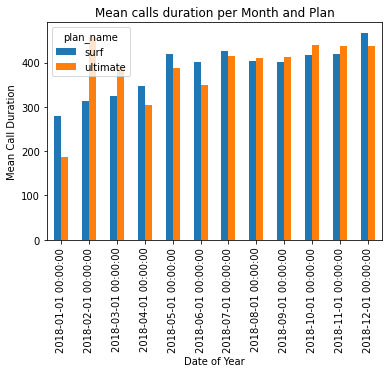

In [29]:
pivot_calls_mean_duration = users_per_month.pivot_table(index = 'date_month',
                          columns = 'plan_name',
                         values = 'call_duration',
                         aggfunc = 'mean')

pivot_calls_mean_duration.plot(xlabel = 'Date of Year',
              ylabel = 'Mean Call Duration',
              kind = 'bar',
              title = 'Mean calls duration per Month and Plan'
              )
plt.show()

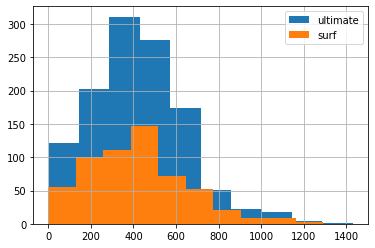

In [30]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

users_per_month_surf = users_per_month[users_per_month['plan_name'] == 'surf']
users_per_month_surf['call_duration'].hist()


users_per_month_ultimate = users_per_month[users_per_month['plan_name'] == 'ultimate']
users_per_month_ultimate['call_duration'].hist()
plt.legend({'surf', 'ultimate'})
plt.show()

In [31]:
# Calcula la media y la varianza de la duración mensual de llamadas.

df_pivot_calls = users_per_month.pivot_table(
                        index = 'date_month',
                        columns = 'plan_name',
                        values = 'call_duration',
                        aggfunc = {'mean', 'var'})

print(df_pivot_calls.head(15))

                  mean                       var              
plan_name         surf    ultimate          surf      ultimate
date_month                                                    
2018-01-01  278.850000  187.453333           NaN  22376.587433
2018-02-01  313.240000  458.316000  90934.192950  59004.345680
2018-03-01  324.985625  389.648571  38165.741733  53331.785381
2018-04-01  346.206286  303.301250  56226.026948  36280.868692
2018-05-01  418.675283  387.340952  55324.752668  49426.122669
2018-06-01  401.525429  349.536757  43182.147964  35334.114628
2018-07-01  426.454382  415.912979  57923.159823  72298.842704
2018-08-01  404.183950  411.488246  48244.970507  52808.925215
2018-09-01  402.010068  413.126479  41696.916513  57056.019895
2018-10-01  417.628785  438.700795  46581.795937  51267.766909
2018-11-01  418.942202  438.496569  44585.274097  58637.117613
2018-12-01  467.447073  436.801040  55667.000587  59435.742379


Diagrama de caja para las llamadas


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='call_duration'>

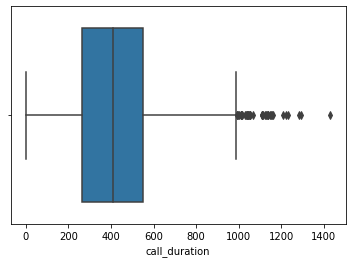

In [32]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

print('Diagrama de caja para las llamadas')
df = users_per_month['call_duration']
sns.boxplot(df)


La cantidad de minutos que incluye el plan surf es mucho menor al del plan ultimate, 500 versus 3000 minutos. De las gráficas descriptivas se puede concluir que el comportamiento de los usuarios entre el plan surf y ultimate son similares; sin embargo, considerando la cantidad de minutos incluidos en los planes se puede concluir que los usuarios con plan surf quedan ajustados con sus minutos mientras que los usuarios con plan ultimate quedan holgados respecto a los minutos que incluye su plan.

### Mensajes

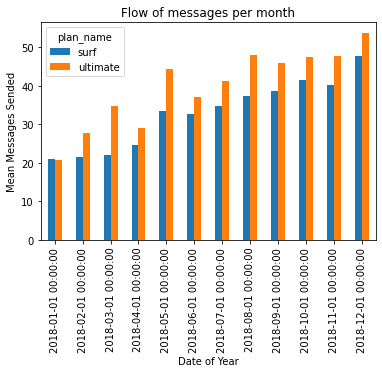

In [33]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
df_pivot_mean_messages = users_per_month.pivot_table(index = 'date_month',
                          columns = 'plan_name',
                         values = 'n_messages',
                         aggfunc = 'mean')

df_pivot_mean_messages.plot(xlabel = 'Date of Year',
              ylabel = 'Mean Messages Sended',
              kind = 'bar',
              title = 'Flow of messages per month'
              )
plt.show()

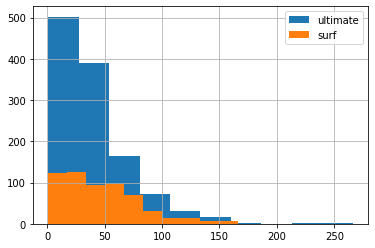

In [34]:
# Compara la cantidad de mensajes consumido por usuarios por plan
users_per_month_surf = users_per_month[users_per_month['plan_name'] == 'surf']
users_per_month_surf['n_messages'].hist()


users_per_month_ultimate = users_per_month[users_per_month['plan_name'] == 'ultimate']
users_per_month_ultimate['n_messages'].hist()
plt.legend({'surf', 'ultimate'})
plt.show()


In [35]:
df_pivot_messages = users_per_month.pivot_table(
                        index = 'date_month',
                        columns = 'plan_name',
                        values = 'n_messages',
                        aggfunc = {'mean', 'var'})

print(df_pivot_messages.head(15))

                 mean                     var             
plan_name        surf   ultimate         surf     ultimate
date_month                                                
2018-01-01  21.000000  20.666667          NaN   310.333333
2018-02-01  21.600000  27.800000   512.800000   529.700000
2018-03-01  21.937500  34.714286   352.062500   613.904762
2018-04-01  24.685714  28.937500   539.751261   512.862500
2018-05-01  33.547170  44.333333   888.675617  1246.933333
2018-06-01  32.742857  37.135135   818.077847   801.731231
2018-07-01  34.786517  41.212766   786.397089   858.084181
2018-08-01  37.302521  47.929825   951.128044  1034.387845
2018-09-01  38.585034  45.901408   897.463610   903.375855
2018-10-01  41.475138  47.488636  1199.439656  1088.160789
2018-11-01  40.087156  47.656863   951.858728  1100.782081
2018-12-01  47.686992  53.744000  1339.971014  1380.175871


La cantidad de mensajes que incluye el plan surf es mucho menor al plan ultimate, 50 versus 1000 mensajes. Si vemos el consumo promedio de mensajes enviados por mes por plan, se observa diferencia en el compartamiento entre los rangos de 0 a 50, por lo que se podría inferir que el comportamiento de los usuarios en relación a los mensajes enviados sí varía mucho según el plan. Posterior a 50 mensajes se observa un comportamiento más parecido; sin embargo, para el plan surf esto signfica un consumo extra de mensajes. En cuanto al flujo de envío de mensajes, la muestra de datos indica que se da un incremento en el consumo de mensajes por mes; sin embargo, no podemos afirmar que se trate de mayor consumo porque podría deberse a un incremento de usuarios.

### Internet

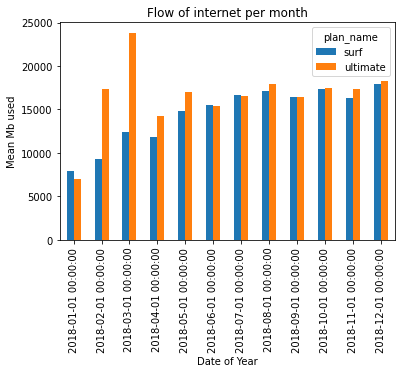

In [36]:
# Comparar el número de mb que tienden a consumir cada mes los usuarios en cada plan
df_pivot_mean_mb = users_per_month.pivot_table(index = 'date_month',
                          columns = 'plan_name',
                         values = 'mb_used',
                         aggfunc = 'mean')

df_pivot_mean_mb.plot(xlabel = 'Date of Year',
              ylabel = 'Mean Mb used',
              kind = 'bar',
              title = 'Flow of internet per month'
              )
plt.show()

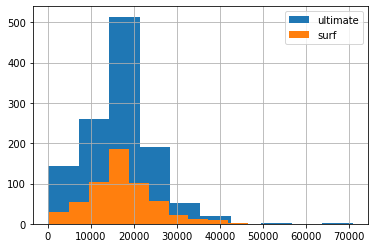

In [37]:
# Compara la cantidad de mb consumido por usuarios por plan
users_per_month_surf = users_per_month[users_per_month['plan_name'] == 'surf']
users_per_month_surf['mb_used'].hist()


users_per_month_ultimate = users_per_month[users_per_month['plan_name'] == 'ultimate']
users_per_month_ultimate['mb_used'].hist()
plt.legend({'surf', 'ultimate'})
plt.show()


In [38]:
df_pivot_mb = users_per_month.pivot_table(
                        index = 'date_month',
                        columns = 'plan_name',
                        values = 'mb_used',
                        aggfunc = {'mean', 'var'})

print(df_pivot_mb.head(15))

                    mean                         var              
plan_name           surf      ultimate          surf      ultimate
date_month                                                        
2018-01-01   7894.790000   6953.200000           NaN  2.458467e+07
2018-02-01   9310.764000  17335.756000  3.464298e+07  4.820796e+07
2018-03-01  12397.342500  23835.722857  5.483533e+07  1.042803e+08
2018-04-01  11851.091429  14285.791875  5.986238e+07  8.914423e+07
2018-05-01  14851.419623  16993.530000  5.894224e+07  5.887343e+07
2018-06-01  15565.743286  15451.022162  5.418714e+07  7.458952e+07
2018-07-01  16708.588315  16499.324255  6.700091e+07  7.117039e+07
2018-08-01  17161.736891  17976.983333  6.557828e+07  5.675148e+07
2018-09-01  16492.743197  16410.551549  4.809417e+07  4.268477e+07
2018-10-01  17406.222376  17512.219205  5.819011e+07  5.558537e+07
2018-11-01  16300.159358  17323.745686  5.232900e+07  5.769802e+07
2018-12-01  17968.352602  18267.285840  6.362857e+07  5.530201

La cantidad de mb que incluye el plan de surf es menor al de ultimate, 15360 mb vs 30720 mb respectivamente. Se observa que el comportamiento de los mb usados por los usuarios entre los planes no es similar, se observa que los usuarios del plan surf tienden a excederse de su plan base además de que la frecuencia de usuarios con plan surf es mayor a los de plan ultimate. 

## Ingreso

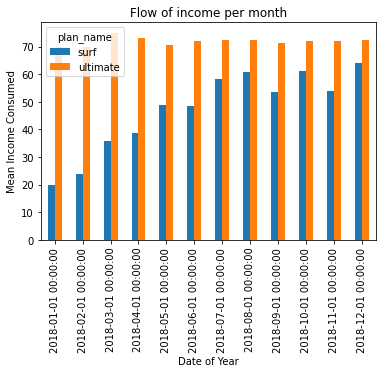

In [39]:
# Compara los ingresos generados cada mes los usuarios de cada plan
df_pivot_mean_income = users_per_month.pivot_table(index = 'date_month',
                          columns = 'plan_name',
                         values = 'income',
                         aggfunc = 'mean')

df_pivot_mean_income.plot(xlabel = 'Date of Year',
              ylabel = 'Mean Income Consumed',
              kind = 'bar',
              title = 'Flow of income per month'
              )
plt.show()

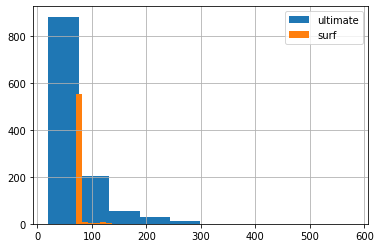

In [40]:
users_per_month_surf = users_per_month[users_per_month['plan_name'] == 'surf']
users_per_month_surf['income'].hist()


users_per_month_ultimate = users_per_month[users_per_month['plan_name'] == 'ultimate']
users_per_month_ultimate['income'].hist()
plt.legend({'surf', 'ultimate'})
plt.show()

In [41]:
df_pivot_income = users_per_month.pivot_table(
                        index = 'date_month',
                        columns = 'plan_name',
                        values = 'income',
                        aggfunc = {'mean', 'var'})

print(df_pivot_income.head(15))

                 mean                     var            
plan_name        surf   ultimate         surf    ultimate
date_month                                               
2018-01-01  20.000000  70.000000          NaN    0.000000
2018-02-01  23.662000  70.000000    25.501220    0.000000
2018-03-01  35.823125  75.000000   409.619970  175.000000
2018-04-01  38.547143  73.062500  1154.280633  150.062500
2018-05-01  48.666604  70.666667  2149.462915    9.333333
2018-06-01  48.465286  71.891892  2248.434556   75.265766
2018-07-01  58.320674  72.382979  3111.704761  130.545791
2018-08-01  60.822521  72.333333  3195.758926  110.833333
2018-09-01  53.588912  71.281690  1879.931763   46.633803
2018-10-01  61.276519  72.068182  2807.317837  170.271160
2018-11-01  53.963716  71.990196  2052.174009  106.128616
2018-12-01  64.137439  72.520000  3742.803526  141.783871


El precio del plan surf es de 30 dólares mientras que el de ultimate de 70 dólares. Se observa que los usuarios con plan ultimate son los que más ingresos generan para la compañía. Por otro lado, los usuarios con plan surf se observa que sus ingresos promedios por mes tienden a ser muco mayor al precio base del plan, por lo que se deduce que los ingresos generados por este plan son en su mayoría por consumos extras. Convendría a la empresa identificar a los usuarios que reiteradamente realizan consumos extras para sugerirles que migren al plan ultimate que si bien el precio a pagar mensual es mayor cubríria la necesidad del usuario y probablemente el precio a pagar sea menor a lo que suelen pagar, por otro lado esta migración beneficiaría a la empresa ya que le aseguraría un ingreso adional recurrente impactando positivamente la rentabilidad de la compañía.

## Prueba las hipótesis estadísticas

Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf

In [42]:
# Prueba las hipótesis

# Validamos si las varianzas son muy diferentes
print('Var 1: ', np.var(users_per_month.query("plan_name == 'surf'")['income']))
print('Var 2: ', np.var(users_per_month.query("plan_name == 'ultimate'")['income']))
print()

# establecemos el nivel crítico de significación estadística
alpha = 0.05

# Hipótesis nula: el ingreso promedio entre los usuarios del plan surf y ultimate sean iguales
# Hipótesis alternativa: el ingreso promedio entre los usuarios del plan surf y ultimate sean diferentes

results = st.ttest_ind(users_per_month.query("plan_name == 'surf'")['income'],
                      users_per_month.query("plan_name == 'ultimate'")['income'],
                      equal_var = False)

# Extraer el valor p
print('valor p: ', results.pvalue) 



if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula.')
else:
    print('No podemos rechazar la hipótesis nula.')
    

Var 1:  2679.3355649361533
Var 2:  112.29420625758782

valor p:  8.689744735945617e-22
Rechazamos la hipótesis nula.


De la prueba de hipótesis de dos colas realizada, hay suficiente evidencia estadística para afirmar que el ingreso promedio entre los planes surf y ultimate son diferentes.

Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

In [43]:
# Prueba las hipótesis

# Validamos si las varianzas son muy diferentes
print('Var 1: ', np.var(users_per_month.query("city_abreviado == 'NY-NJ'")['income']))
print('Var 2: ', np.var(users_per_month.query("city_abreviado != 'NY-NJ'")['income']))
print()

# establecemos el nivel crítico de significación estadística
alpha = 0.05

# Hipótesis nula: el ingreso promedio de usuarios entre el área de NY-NJ y otras regiones sean iguales
# Hipótesis alternativa: el ingreso promedio de usuarios entre el área de NY-NJ y otras regiones sean diferentes

results = st.ttest_ind(users_per_month.query("city_abreviado == 'NY-NJ'")['income'],
                      users_per_month.query("city_abreviado != 'NY-NJ'")['income'],
                      equal_var = False)

# Extraer el valor p
print('valor p: ', results.pvalue) 



if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula.')
else:
    print('No podemos rechazar la hipótesis nula.')
    

Var 1:  1419.652300497167
Var 2:  1964.3672481344047

valor p:  0.0020751006623128845
Rechazamos la hipótesis nula.


De la prueba de hipótesis de dos colas realizada, hay suficiente evidencia estadística para afirmar que el ingreso promedio entre el área NY-NJ y otras regiones son diferentes.

## Conclusión general

Luego de haber analizado la muestra de datos de 500 usuarios se concluye lo siguiente:
* Los histogramas nos muestran que hay mayor consumo extra de minutos, mensajes y mb de los usuarios con plan surf.
* En el histograma de ingresos se muestra que el plan ultimate es el que más ingresos genera a la compañía. Aquí podría sugerirse a la empresa en realizar migración de planes a los usuarios del plan surf que reiteradamente consumen minutos, mensajes y mb extras para que su ingreso no recurrente se convierta en recurrente para la empresa beneficiando la rentabilidad.
* El consumo de minutos, mensajes y mb incrementa mes a mes; sin embargo, no podemos afirmar que se debe a un mayor consumo, ya que puede deberse a mayor cantidad de usuarios registrados por mes.
* Basado en la prueba de hipótesis se tiene suficiente estadística para afirmar que el ingreso promedio entre los planes de surf y ultimate son diferentes.
